# LV 4: Word Embeddings i Semantička Sličnost

---

## 1. Uvod u Word Embeddings

Word embeddings predstavljaju tehniku prikaza riječi u numeričkom obliku ("vektori riječi") gdje su slične riječi (po značenju) smještene blizu u vektorskom prostoru. Umjesto rada s pojedinačnim riječima, tekstualne podatke modeliramo kao skup vektora koji dobro zadržavaju semantičke odnose. Time omogućujemo računalima napredno razumijevanje značenja riječi, pa se embeddingi koriste u zadacima poput prepoznavanja sinonima, pronalaženja antonima, mjerenja sličnosti rečenica i mnogim naprednim aplikacijama obrade jezika.

### Najčešće korištene tehnike:
- **Word2Vec**: model treniran na temelju konteksta riječi (CBOW i Skip-gram)
- **GloVe** (Global Vectors): kombinira globalnu statistiku i lokalni kontekst
- **FastText**: proširenje Word2Veca koje uključuje podriječi

### Korištenjem pretreniranih modela embeddinga možemo:
- Lako pronaći slične i suprotne riječi
- Vizualizirati prostorne odnose između pojmova (PCA, t-SNE)
- Mjeriti sličnost između rečenica ili dokumenata
- Koristiti embeddinge kao ulazne podatke za napredne NLP modele

Nakon ove vježbe studenti će moći raditi s embeddingima, razumjeti kako oni predstavljaju značenje riječi te koristiti embeddinge za analizu sličnosti i semantičkih odnosa u tekstu.

---



## 2. Korištene biblioteke

U ovoj vježbi koristimo:

**gensim**  
Biblioteka za rad s word embeddingima, uključuje:
- Učitavanje pretreniranih Word2Vec i GloVe modela
- Računanje semantičke sličnosti
- Operacije s vektorima riječi

**scikit-learn**  
Za smanjenje dimenzionalnosti i vizualizaciju (PCA, t-SNE).

**matplotlib**  
Za crtanje grafova i vizualizacija embedding prostora.

**numpy**  
Za matematičke operacije s vektorima.

---


In [1]:
!pip install -q gensim numpy matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 53.8 MB/s eta 0:00:00


In [2]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 3. Inicijalizacija okruženja i učitavanje modela

---

### Primjer: Učitavanje pretreniranog Word2Vec modela

Gensim biblioteka omogućuje jednostavno preuzimanje različitih pretreniranih modela. U ovom primjeru koristimo **glove-wiki-gigaword-50**, manji model (50 dimenzija) pogodan za brzo testiranje.

Možete koristiti i veće modele poput:
- `glove-wiki-gigaword-100`
- `glove-wiki-gigaword-200`
- `word2vec-google-news-300` (vrlo velik, potrebno više vremena)


In [3]:
print("Učitavanje modela...")
model = api.load("glove-wiki-gigaword-50")
print("Model uspješno učitan!")

print(f"Broj riječi u modelu: {len(model)}")

Učitavanje modela...
[==================================================] 100.0% 66.0/66.0MB downloaded
Model uspješno učitan!
Broj riječi u modelu: 400000


---

### Primjer: Prikaz vektora riječi

Svaka riječ u modelu ima svoj vektor (niz brojeva). Duljina vektora ovisi o modelu – ovdje je 50 dimenzija.

Demonstracija kako izgleda embedding za riječ "king".


In [4]:
vector_king = model['king']

print(f"Vektor za riječ 'king' (prvih 10 vrijednosti):")
print(vector_king[:10])

print(f"\nDuljina vektora: {len(vector_king)}")
print(f"Tip podatka: {type(vector_king)}")


Vektor za riječ 'king' (prvih 10 vrijednosti):
[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]

Duljina vektora: 50
Tip podatka: <class 'numpy.ndarray'>


---

### Primjer: Računanje sličnosti između dviju riječi

Embeddings omogućuju mjerenje semantičke sličnosti. Model računa **kosinusnu sličnost** između vektora dviju riječi. Vrijednost je između 0 (potpuno različite) i 1 (identične).


In [5]:

similarity = model.similarity('king', 'queen')
print(f"Sličnost između 'king' i 'queen': {similarity:.4f}")

similarity2 = model.similarity('king', 'apple')
print(f"Sličnost između 'king' i 'apple': {similarity2:.4f}")

similarity3 = model.similarity('computer', 'laptop')
print(f"Sličnost između 'computer' i 'laptop': {similarity3:.4f}")


Sličnost između 'king' i 'queen': 0.7839
Sličnost između 'king' i 'apple': 0.3047
Sličnost između 'computer' i 'laptop': 0.7741


---

### Primjer: Pronalaženje sličnih riječi

Možemo pronaći riječi koje su najbliže (najsličnije) odabranoj riječi, korisno za traženje sinonima.


In [6]:

similar_words = model.most_similar('king', topn=5)

print("5 najsličnijih riječi za 'king':")
for word, score in similar_words:
    print(f"  {word}: {score:.4f}")


5 najsličnijih riječi za 'king':
  prince: 0.8236
  queen: 0.7839
  ii: 0.7746
  emperor: 0.7736
  son: 0.7667


---

### Primjer: Semantičke operacije – Vektorska aritmetika

Jedan od najpoznatijih primjera word embeddinga je **king - man + woman ≈ queen**.

Ovim pristupom možemo "računati" sa značenjima riječi.


In [7]:
# King - man + woman = ?
result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

print("king - man + woman =")
print(f"  {result[0][0]} (sličnost: {result[0][1]:.4f})")

# Paris - France + Italy = ?
result2 = model.most_similar(positive=['paris', 'italy'], negative=['france'], topn=3)

print("\nparis - france + italy =")
for word, score in result2:
    print(f"  {word}: {score:.4f}")


king - man + woman =
  queen (sličnost: 0.8524)

paris - france + italy =
  rome: 0.8466
  milan: 0.7766
  turin: 0.7666


---

### Primjer: Vizualizacija embeddinga pomoću PCA

PCA (Principal Component Analysis) je linearni algoritam koji smanjuje broj dimenzija vektora, zadržavajući što više informacija. Koristimo ga za prikaz riječi u 2D prostoru.

Ovdje ćemo vizualizirati nekoliko odabranih riječi iz različitih domena.


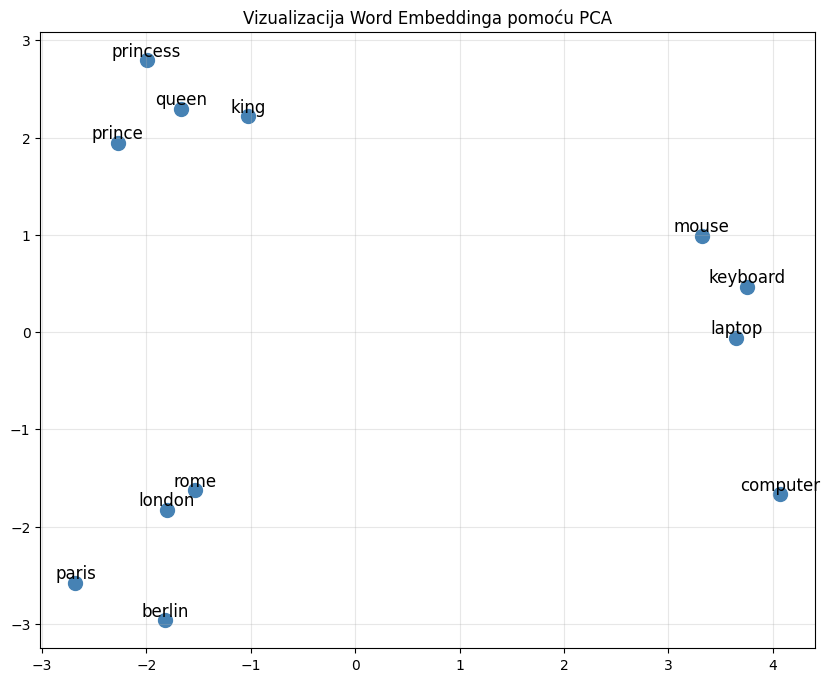

In [8]:
words = ['king', 'queen', 'prince', 'princess',
         'paris', 'london', 'berlin', 'rome',
         'computer', 'laptop', 'keyboard', 'mouse']

word_vectors = np.array([model[word] for word in words])

pca = PCA(n_components=2)
coords = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], s=100, color='steelblue')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]),
                 fontsize=12, ha='center', va='bottom')

plt.title('Vizualizacija Word Embeddinga pomoću PCA')
plt.grid(True, alpha=0.3)
plt.show()

---

### Primjer: Vizualizacija embeddinga pomoću t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) je nelinearna tehnika koja bolje čuva lokalne odnose između riječi. Često daje preglednije klastere nego PCA.

**Napomena**: t-SNE može davati različite rezultate pri svakom pokretanju zbog stohastičke prirode algoritma.


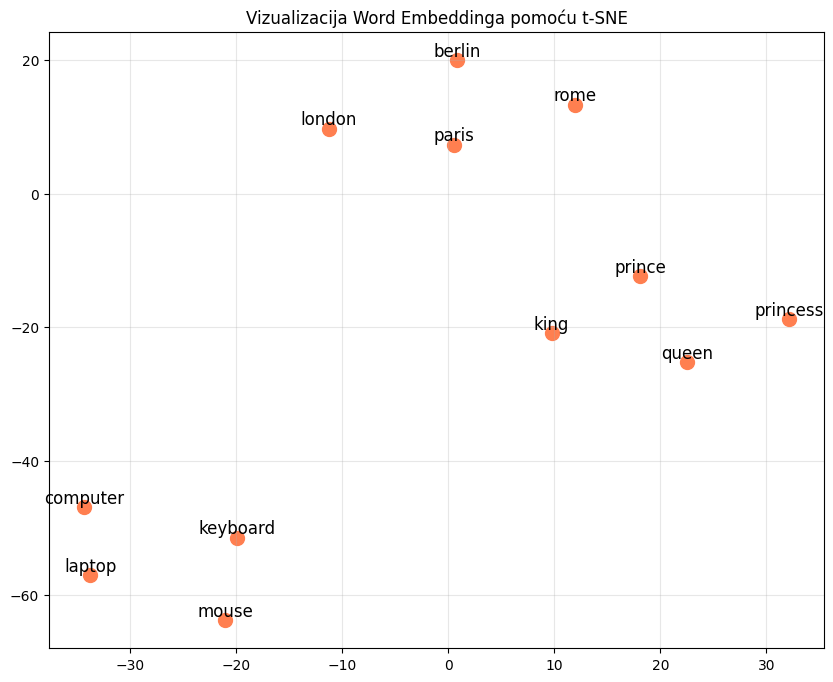

In [9]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
coords_tsne = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(coords_tsne[:, 0], coords_tsne[:, 1], s=100, color='coral')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords_tsne[i, 0], coords_tsne[i, 1]),
                 fontsize=12, ha='center', va='bottom')

plt.title('Vizualizacija Word Embeddinga pomoću t-SNE')
plt.grid(True, alpha=0.3)
plt.show()

---

### Primjer: Računanje sličnosti rečenica

Isti pristup možemo proširiti i na rečenice: najjednostavniji način je izračunati prosječni embedding, odnosno prosjek vektora svih riječi u rečenici.

**Napomena**: Ova metoda ne uzima u obzir redoslijed riječi, ali daje korisnu aproksimaciju semantičke sličnosti.


In [10]:
def sentence_vector(sentence, model):
    words = [word.lower() for word in sentence.split() if word.lower() in model]
    if not words:
        return np.zeros(model.vector_size)
    return np.mean([model[word] for word in words], axis=0)

def sentence_similarity(sent1, sent2, model):
    vec1 = sentence_vector(sent1, model)
    vec2 = sentence_vector(sent2, model)

    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)

    if norm1 == 0 or norm2 == 0:
        return 0.0

    return dot_product / (norm1 * norm2)


s1 = "The cat sits on the mat."
s2 = "A dog rests on the carpet."
s3 = "I love programming in Python."

print(f"Sličnost između rečenica 1 i 2: {sentence_similarity(s1, s2, model):.4f}")
print(f"Sličnost između rečenica 1 i 3: {sentence_similarity(s1, s3, model):.4f}")
print(f"Sličnost između rečenica 2 i 3: {sentence_similarity(s2, s3, model):.4f}")

Sličnost između rečenica 1 i 2: 0.9715
Sličnost između rečenica 1 i 3: 0.8037
Sličnost između rečenica 2 i 3: 0.8108


## Zadatak 1: Istraživanje semantičkih odnosa i vektorska aritmetika

Koristite učitani Word2Vec/GloVe model za istraživanje semantičkih odnosa između riječi. Pronađite sinonime, testirajte vektorsku aritmetiku i analizirajte rezultate.



1. Pronađite 10 najsličnijih riječi za pojam "doctor"
2. Pronađite 10 najsličnijih riječi za pojam "technology"
3. Testirajte vektorsku aritmetiku:
   - king - man + woman = ?
   - doctor - man + woman = ?
   - berlin - germany + france = ?
   - python - programming + cooking = ?
4. Analizirajte rezultate i objasnite koje analogije model dobro prepoznaje, a gdje griješi


In [18]:
# Zadatak 1: Istraživanje semantičkih odnosa i vektorska aritmetika
def print_similar(word):
    print(f"\n10 najsličnijih riječi za '{word}':")
    results = model.most_similar(word, topn=10)
    for w, score in results:
        print(f"{w}: {round(score, 4)}")

print_similar("doctor")
print_similar("technology")


10 najsličnijih riječi za 'doctor':
nurse: 0.7977
physician: 0.7965
patient: 0.7612
child: 0.7559
teacher: 0.7538
surgeon: 0.7479
psychiatrist: 0.7422
doctors: 0.7394
father: 0.7334
mother: 0.7284

10 najsličnijih riječi za 'technology':
technologies: 0.8928
computer: 0.8526
systems: 0.8289
software: 0.809
computing: 0.7991
innovation: 0.7876
business: 0.7864
tool: 0.7848
developed: 0.7802
research: 0.7735


In [19]:
def print_analogy(a, b, c):
    print(f"\nAnalogia: {a} - {b} + {c}")
    try:
        results = model.most_similar(positive=[a, c], negative=[b], topn=5)
        for w, score in results:
            print(f"{w}: {round(score, 4)}")
    except KeyError as e:
        print(f"Riječ nije u vokabularu: {e}")



print_analogy("king", "man", "woman")
print_analogy("doctor", "man", "woman")
print_analogy("berlin", "germany", "france")
print_analogy("python", "programming", "cooking")


Analogia: king - man + woman
queen: 0.8524
throne: 0.7664
prince: 0.7592
daughter: 0.7474
elizabeth: 0.746

Analogia: doctor - man + woman
nurse: 0.8405
child: 0.7663
pregnant: 0.757
mother: 0.7517
patient: 0.7517

Analogia: berlin - germany + france
paris: 0.9169
prohertrib: 0.795
brussels: 0.7606
french: 0.7594
vienna: 0.7517

Analogia: python - programming + cooking
roasted: 0.6643
goat: 0.6612
seaweed: 0.6557
beans: 0.6493
chestnuts: 0.6485


**Zaključak:**
Model uspješno prepoznaje mnoge semantičke odnose, posebno one koji su jasno definirani i često se pojavljuju u jeziku (poput rodnih uloga ili odnosa glavni grad-država). Međutim, kada se suoči s homonimima ili riječima s više značenja, ili kada je analogija previše apstraktna, model se može osloniti na najčešću ili najdirektniju asocijaciju iz svog treninga, što ponekad može dovesti do manje preciznih ili čak pogrešnih rezultata (kao u primjeru 'python').

## Zadatak 2: Detekcija outliera - koja riječ ne pripada grupi?





Implementirajte funkciju koja detektira koja riječ ne pripada grupi sličnih riječi. Ovo je praktična primjena u analizi teksta i detekciji anomalija

**Napomena**:  Koristite embedding model za pronalaženje "outliera".

Testirajte sljedeće grupe riječi i pronađite koja riječ ne pripada:

1. ['breakfast', 'lunch', 'dinner', 'cement']
2. ['cat', 'dog', 'mouse', 'computer']
3. ['paris', 'london', 'berlin', 'table']
4. ['happy', 'joyful', 'cheerful', 'angry']
5. ['python', 'java', 'javascript', 'banana']

Za svaku grupu:
- Pronađite outlier riječ
- Izračunajte njenu prosječnu sličnost s ostalim riječima
- Objasnite zašto je detektirana kao outlier


In [12]:
test_groups = [
    ['breakfast', 'lunch', 'dinner', 'cement'],
    ['cat', 'dog', 'mouse', 'computer'],
    ['paris', 'london', 'berlin', 'table'],
    ['happy', 'joyful', 'cheerful', 'angry'],
    ['python', 'java', 'javascript', 'banana']
]

In [20]:
# Zadatak 2: Detekcija outliera
def find_outlier(group, model):
    # Provjeri da su sve riječi u vokabularu
    valid_words = [w for w in group if w in model.key_to_index]
    if len(valid_words) < len(group):
        missing = set(group) - set(valid_words)
        print(f"Sljedeće riječi nisu u vokabularu i bit će ignorirane: {missing}")

    # Računaj prosječnu sličnost svake riječi prema ostalima
    avg_similarities = {}
    for word in valid_words:
        others = [w for w in valid_words if w != word]
        sims = [model.similarity(word, other) for other in others]
        avg_sim = np.mean(sims)
        avg_similarities[word] = avg_sim

    # Outlier je riječ s najmanjom prosječnom sličnosti
    outlier_word = min(avg_similarities, key=avg_similarities.get)
    outlier_score = avg_similarities[outlier_word]

    return outlier_word, outlier_score, avg_similarities

for i, group in enumerate(test_groups, 1):
    print(f"\nGrupa {i}: {group}")
    outlier, score, similarities = find_outlier(group, model)
    print(f"Detektirana outlier riječ: '{outlier}'")
    print(f"Prosječna sličnost outliera s ostalima: {score:.4f}")
    print("Prosječne sličnosti riječi u grupi:")
    for w, s in similarities.items():
        print(f"  {w}: {s:.4f}")

    # Kratko objašnjenje
    print(f"Objašnjenje: '{outlier}' je odabrana jer ima najnižu prosječnu sličnost s ostalim riječima u grupi.")


Grupa 1: ['breakfast', 'lunch', 'dinner', 'cement']
Detektirana outlier riječ: 'cement'
Prosječna sličnost outliera s ostalima: 0.1079
Prosječne sličnosti riječi u grupi:
  breakfast: 0.6311
  lunch: 0.6091
  dinner: 0.6038
  cement: 0.1079
Objašnjenje: 'cement' je odabrana jer ima najnižu prosječnu sličnost s ostalim riječima u grupi.

Grupa 2: ['cat', 'dog', 'mouse', 'computer']
Detektirana outlier riječ: 'computer'
Prosječna sličnost outliera s ostalima: 0.4032
Prosječne sličnosti riječi u grupi:
  cat: 0.6825
  dog: 0.6348
  mouse: 0.6491
  computer: 0.4032
Objašnjenje: 'computer' je odabrana jer ima najnižu prosječnu sličnost s ostalim riječima u grupi.

Grupa 3: ['paris', 'london', 'berlin', 'table']
Detektirana outlier riječ: 'table'
Prosječna sličnost outliera s ostalima: 0.4166
Prosječne sličnosti riječi u grupi:
  paris: 0.6333
  london: 0.6087
  berlin: 0.5761
  table: 0.4166
Objašnjenje: 'table' je odabrana jer ima najnižu prosječnu sličnost s ostalim riječima u grupi.

Gr

## Zadatak 3: Vizualizacija tematskih klastera pomoću PCA i t-SNE


Vizualizirajte embedding prostor za riječi iz različitih domena (hrana, tehnologija, sport, gradovi). Usporedite PCA i t-SNE vizualizacije.

Koristite sljedeće riječi iz 4 kategorije:
- Hrana: ['pizza', 'burger', 'pasta', 'salad', 'bread']
- Tehnologija: ['computer', 'laptop', 'smartphone', 'tablet', 'software']
- Sport: ['football', 'basketball', 'tennis', 'swimming', 'running']
- Gradovi: ['paris', 'london', 'tokyo', 'berlin', 'rome']

Zadaci:
1. Vizualizirajte sve riječi pomoću PCA u 2D prostoru
2. Vizualizirajte iste riječi pomoću t-SNE
3. Obojite svaku kategoriju različitom bojom
4. Usporedite rezultate i objasnite razlike između PCA i t-SNE


In [14]:
categories = {
    'Hrana': ['pizza', 'burger', 'pasta', 'salad', 'bread'],
    'Tehnologija': ['computer', 'laptop', 'smartphone', 'tablet', 'software'],
    'Sport': ['football', 'basketball', 'tennis', 'swimming', 'running'],
    'Gradovi': ['paris', 'london', 'tokyo', 'berlin', 'rome']
}

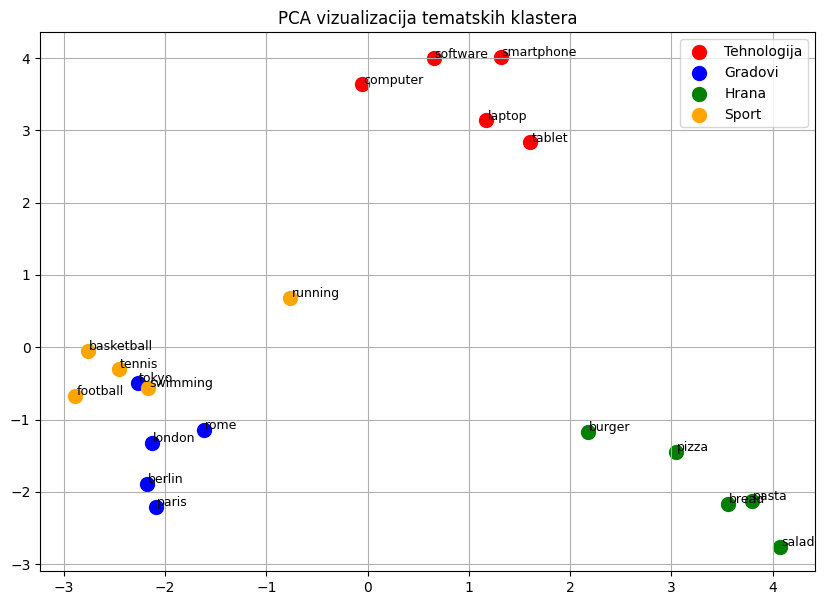

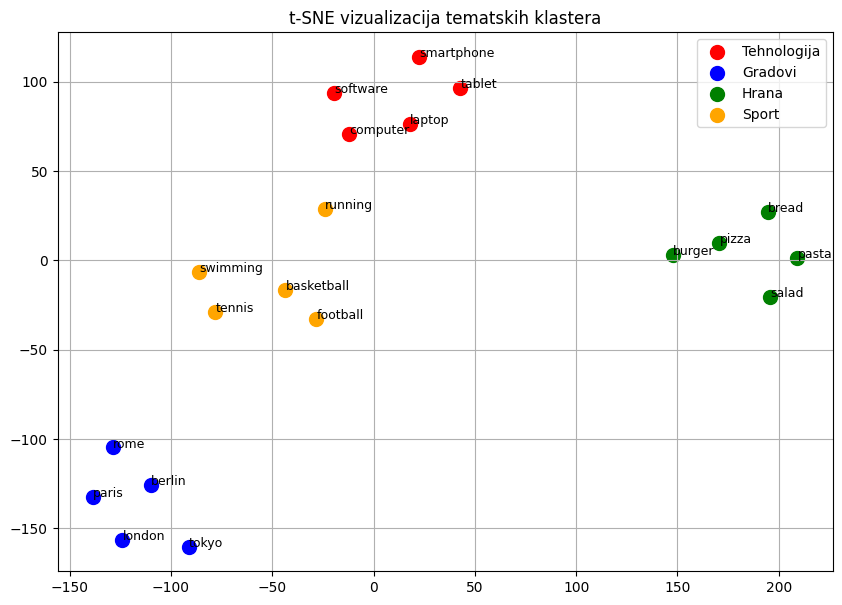

In [21]:
# Zadatak 3: Vizualizacija tematskih klastera
words = []
labels = []
vectors = []

for category, word_list in categories.items():
    for word in word_list:
        if word in model.key_to_index:
            words.append(word)
            labels.append(category)
            vectors.append(model[word])
        else:
            print(f"Riječ '{word}' nije u vokabularu modela i bit će izostavljena.")

vectors = np.array(vectors)

# 4. PCA projekcija u 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)

# 5. t-SNE projekcija u 2D
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto', perplexity=5)
tsne_result = tsne.fit_transform(vectors)

# 6. Funkcija za plotanje
def plot_2d(X, labels, title):
    plt.figure(figsize=(10, 7))
    unique_labels = list(set(labels))
    colors = ['red', 'blue', 'green', 'orange']

    for i, label in enumerate(unique_labels):
        idxs = [j for j, lab in enumerate(labels) if lab == label]
        plt.scatter(X[idxs, 0], X[idxs, 1], c=colors[i], label=label, s=100)
        for j in idxs:
            plt.text(X[j, 0]+0.01, X[j, 1]+0.01, words[j], fontsize=9)

    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# 7. Plot PCA i t-SNE
plot_2d(pca_result, labels, "PCA vizualizacija tematskih klastera")
plot_2d(tsne_result, labels, "t-SNE vizualizacija tematskih klastera")

### **Usporedba PCA i t-SNE**

PCA prikazuje globalnu strukturu podataka, dok t-SNE bolje čuva lokalne odnose, što rezultira jasnijim i kompaktnijim klasterima za slične riječi. t-SNE vizualizacija obično bolje grupira tematski povezane riječi zbog svog nelinearnog pristupa.

## Zadatak 4: Semantička sličnost rečenica i analiza tekstova



Implementirajte funkciju za mjerenje sličnosti rečenica i testirajte na različitim parovima rečenica te analizirajte gdje metoda radi dobro, a gdje ima ograničenja.


Funkciju testirajte je na sljedećim parovima rečenica:

1. "The cat sits on the mat." vs "A cat is sitting on a rug."
2. "I love programming in Python." vs "Python programming is my passion."
3. "The weather is nice today." vs "I enjoy coding in Python."
4. "Machine learning is fascinating." vs "Artificial intelligence is interesting."
5. "How do I reset my password?" vs "I forgot my password, how to recover it?"
6. "The quick brown fox jumps." vs "A fast auburn fox leaps."

Zadaci:
1. Implementirajte funkciju sentence_similarity() koja računa prosječni embedding
2. Izračunajte sličnost za sve parove
3. Analizirajte rezultate - koje parove model prepoznaje kao slične?
4. Identificirajte ograničenja metode prosječnog embeddinga
5. Predložite moguća poboljšanja


In [16]:
sentence_pairs = [
    ("The cat sits on the mat.", "A cat is sitting on a rug."),
    ("I love programming in Python.", "Python programming is my passion."),
    ("The weather is nice today.", "I enjoy coding in Python."),
    ("Machine learning is fascinating.", "Artificial intelligence is interesting."),
    ("How do I reset my password?", "I forgot my password, how to recover it?"),
    ("The quick brown fox jumps.", "A fast auburn fox leaps.")
]

In [22]:
# Zadatak 4: Semantička sličnost rečenica
import re
from sklearn.metrics.pairwise import cosine_similarity

def preprocess_sentence(sentence):
    # Smanji na mala slova i makni interpunkciju
    sentence = sentence.lower()
    sentence = re.sub(r'[^\w\s]', '', sentence)
    words = sentence.split()
    return words

def sentence_embedding(sentence, model):
    words = preprocess_sentence(sentence)
    valid_words = [w for w in words if w in model.key_to_index]
    if not valid_words:
        # Ako nijedna riječ nije u vokabularu, vrati nulti vektor
        return np.zeros(model.vector_size)
    vectors = [model[w] for w in valid_words]
    avg_vector = np.mean(vectors, axis=0)
    return avg_vector

def sentence_similarity(sent1, sent2, model):
    vec1 = sentence_embedding(sent1, model).reshape(1, -1)
    vec2 = sentence_embedding(sent2, model).reshape(1, -1)
    sim = cosine_similarity(vec1, vec2)[0][0]
    return sim

print("\nRezultati sličnosti rečenica:\n")
for i, (s1, s2) in enumerate(sentence_pairs, 1):
    sim_score = sentence_similarity(s1, s2, model)
    print(f"Par {i}:")
    print(f"  R1: {s1}")
    print(f"  R2: {s2}")
    print(f"  Sličnost: {sim_score:.4f}\n")




Rezultati sličnosti rečenica:

Par 1:
  R1: The cat sits on the mat.
  R2: A cat is sitting on a rug.
  Sličnost: 0.9524

Par 2:
  R1: I love programming in Python.
  R2: Python programming is my passion.
  Sličnost: 0.9664

Par 3:
  R1: The weather is nice today.
  R2: I enjoy coding in Python.
  Sličnost: 0.8401

Par 4:
  R1: Machine learning is fascinating.
  R2: Artificial intelligence is interesting.
  Sličnost: 0.8881

Par 5:
  R1: How do I reset my password?
  R2: I forgot my password, how to recover it?
  Sličnost: 0.9632

Par 6:
  R1: The quick brown fox jumps.
  R2: A fast auburn fox leaps.
  Sličnost: 0.9158



### **Analiza rezultata semantičke sličnosti rečenica**

Metoda prosječnog embeddinga dobro hvata sličnost kada rečenice dijele slične riječi ili su varijacije iste ideje, npr. par 1 i 2.
Međutim, metoda ne prepoznaje dobro sličnost kada se koriste različite riječi za slične koncepte ili kada rečenice imaju različite teme (par 3 i 4).
Također, sintaktičke i kontekstualne razlike se ne hvataju dobro jer se gubi redoslijed riječi i kontekst.
Poboljšanja mogu uključivati korištenje modela koji generiraju embeddinge za cijele rečenice (npr. Sentence-BERT) ili uvođenje ponderiranja riječi.